In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [14]:
# Replace with your actual file path
file_path = 'C:/Users/thaplood2/Desktop/Testing/993675_jackknife_sigConn_aparc35.xlsx'

# Read the Excel file, assuming the first column has ROI names and the rest are correlation values
df_correlations = pd.read_excel(file_path, sheet_name = 1)

# Extract ROI names (assuming they're in the first column) and correlation data
roi_names = df_correlations.iloc[:, 0].astype(int).tolist()  # ROI names (first column)
correlation_data = df_correlations.iloc[:, 1:]  # All other columns contain correlation values

# Print output for verification
print("ROI Names:", roi_names[:23])  # Display first 10 ROI names as a sample
print("Correlation Data (First 5 Rows):\n", correlation_data.head())


ROI Names: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Correlation Data (First 5 Rows):
           1         2         3         4         5         6         7  \
0  0.728437  0.724377  0.718932  0.722957  0.724007  0.724762  0.724741   
1  0.620706  0.622943  0.625594  0.626928  0.622176  0.628138  0.624596   
2  0.738173  0.741713  0.730800  0.731313  0.738978  0.728900  0.735167   
3  0.525312  0.539377  0.521051  0.513317  0.517846  0.509164  0.518162   
4  0.898648  0.900495  0.901450  0.905392  0.904827  0.905432  0.909796   

          8         9        10  ...       133       134       135       136  \
0  0.721933  0.742677  0.730705  ...  0.723611  0.727112  0.725944  0.729054   
1  0.623610  0.624341  0.629024  ...  0.632701  0.634533  0.629037  0.629906   
2  0.742482  0.740331  0.741157  ...  0.741866  0.736758  0.729717  0.738745   
3  0.517962  0.523475  0.531152  ...  0.526954  0.529776  0.530286  0.527423   
4  0.900465  0.901004

In [15]:
# Define a threshold for including edges (optional, set to 0.5 as an example)
threshold = 0.5

# Create an empty graph
G = nx.Graph()

print("Graph initialized and threshold set to", threshold)


Graph initialized and threshold set to 0.5


In [16]:
# Number of ROIs
num_rois = len(roi_names)

# Print the correlation matrix for verification (first 5 rows and 5 columns as a sample)
print(" Correlation Matrix (First 5x5 Subset)")
print(correlation_data.iloc[:5, :5])

# Loop through the correlation matrix and add edges to the graph
for i in range(num_rois):
    for j in range(i + 1, num_rois):  # Loop through the upper triangle to avoid duplicates
        correlation_value = correlation_data.iloc[i, j]  # Get the correlation between ROI i and ROI j
        
        # Add an edge only if the correlation value is above the threshold
        if pd.notna(correlation_value) and correlation_value > threshold:
            G.add_edge(roi_names[i], roi_names[j], weight=correlation_value)

# Output the resulting graph info
print(f" Edges added to the graph based on correlation values (Threshold {threshold})")
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


 Correlation Matrix (First 5x5 Subset)
          1         2         3         4         5
0  0.728437  0.724377  0.718932  0.722957  0.724007
1  0.620706  0.622943  0.625594  0.626928  0.622176
2  0.738173  0.741713  0.730800  0.731313  0.738978
3  0.525312  0.539377  0.521051  0.513317  0.517846
4  0.898648  0.900495  0.901450  0.905392  0.904827
 Edges added to the graph based on correlation values (Threshold 0.5)
Graph has 24 nodes and 214 edges


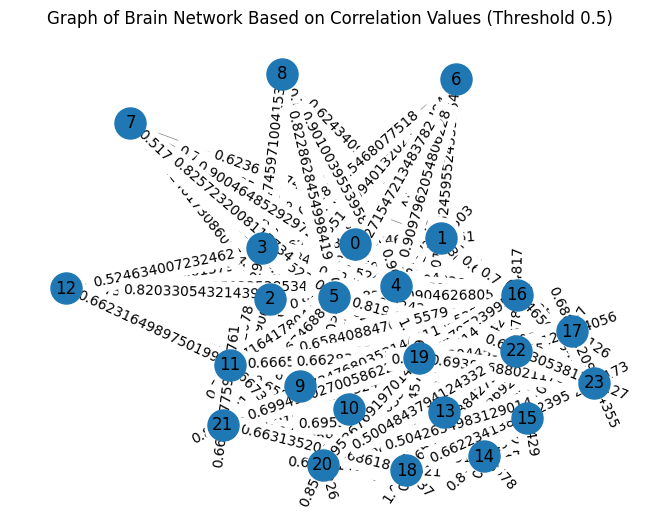

In [17]:
# Create a layout for visualization (spring layout for a neat appearance)

# Set a random seed for reproducibility
seed = 42

pos = nx.spring_layout(G, seed=seed)

# Draw the graph with node labels, node size, and edge width proportional to the correlation weights
nx.draw(G, pos, with_labels=True, node_size=500, edge_color='gray', width=0.5)

# Optionally, display correlation values as edge labels (for clarity)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title(f'Graph of Brain Network Based on Correlation Values (Threshold {threshold})')
plt.show()




Modularity of the graph: 0.0713


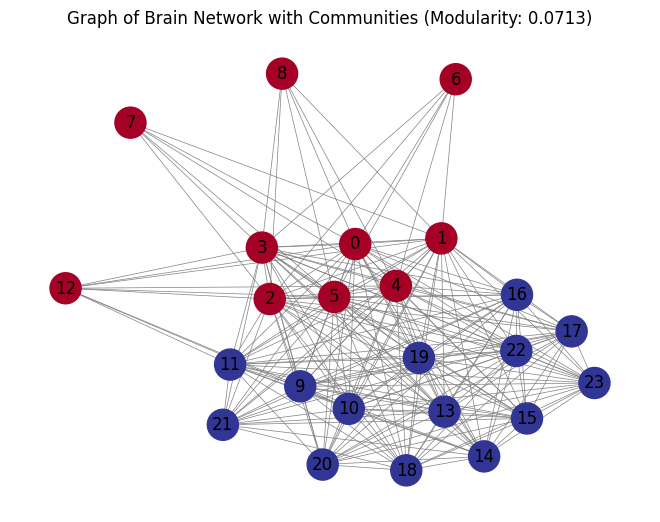

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # Louvain community detection

# Assuming the graph 'G' has already been created in previous steps

# Step 6: Perform Louvain community detection
partition = community_louvain.best_partition(G)

# Calculate modularity
modularity = community_louvain.modularity(partition, G)

print(f"Modularity of the graph: {modularity:.4f}")

# Optional: Visualize the graph with community colors
pos = nx.spring_layout(G, seed=42)  # Use fixed seed for consistent layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color=[partition[node] for node in G.nodes()],
        cmap=plt.cm.RdYlBu, edge_color='gray', width=0.5)

# Display the modularity on the plot
plt.title(f'Graph of Brain Network with Communities (Modularity: {modularity:.4f})')
plt.show()
